<a href="https://colab.research.google.com/github/Kelompok5Usb/DL/blob/main/klasifikasiSmsSpam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# klasifikasi sms spam



In [ ]:
! wget https://raw.githubusercontent.com/gevabriel/dataset/main/indo_spam.csv

--2024-06-27 10:58:30--  https://raw.githubusercontent.com/gevabriel/dataset/main/indo_spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 132904 (130K) [text/plain]
Saving to: ‘indo_spam.csv.1’

indo_spam.csv.1     100%[===================>] 129.79K  --.-KB/s    in 0.02s   

2024-06-27 10:58:30 (7.10 MB/s) - ‘indo_spam.csv.1’ saved [132904/132904]



## import library

In [ ]:
pip install datasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as pl
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from transformers import AutoModelForSequenceClassification
from transformers import Trainer
from datasets import load_metric

## baca dataset dan mendeskiripsikan dataset

In [ ]:
sms = pd.read_csv('indo_spam.csv')
sms

,Kategori,Pesan
0,spam,Plg Yth: Simcard anda mendptkan bonus poin plu...
1,ham,Iya ih ko sedih sih gtau kapan lg ke bandung :(
2,ham,Kalau mau bikin model/controller mending per a...
3,ham,Selamat nama1. Semoga selalu menempuh hidup ya...
4,spam,Tingkatkan nilai isi ulang Anda selanjutnya mi...
...,...,...
1138,ham,Yg ragu sm bulet/datar atau yg pgn ikutan deba...
1139,ham,"Semangat yang ibu gita, ibu putri dan bapak ad..."
1140,ham,"nama1, minta database kamu sama view dan contr..."
1141,spam,Dapatkan GRATIS 1 cappuccino (hot/ice) & Freza...


In [ ]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kategori  1143 non-null   object
 1   Pesan     1143 non-null   object
dtypes: object(2)
memory usage: 18.0+ KB


In [ ]:
sms.describe()

,Kategori,Pesan
count,1143,1143
unique,2,1142
top,spam,"bebas nama1, terus nanti kalau ada tgl libur, ..."
freq,574,2


### pelabelan kategori dengan angka numerik agar memudahakan bagian preprocessing text dan juga cleaning data

In [ ]:
sms['label']=  sms['Kategori'].apply(lambda x:0 if x=='ham' else 1)

In [ ]:
sms.head()

,Kategori,Pesan,label
0,spam,Plg Yth: Simcard anda mendptkan bonus poin plu...,1
1,ham,Iya ih ko sedih sih gtau kapan lg ke bandung :(,0
2,ham,Kalau mau bikin model/controller mending per a...,0
3,ham,Selamat nama1. Semoga selalu menempuh hidup ya...,0
4,spam,Tingkatkan nilai isi ulang Anda selanjutnya mi...,1


###  cleaning data (membersihkan dataset dari berbagai karakter, emoji, angka, dan sbb. agar nnti pada saat pemodelan, model dapat belajar lebih efisien dan tidak keliru)


In [ ]:
sms.rename(columns={"Pesan": "Teks"}, inplace=True)
sms

,Kategori,Teks,label
0,spam,Plg Yth: Simcard anda mendptkan bonus poin plu...,1
1,ham,Iya ih ko sedih sih gtau kapan lg ke bandung :(,0
2,ham,Kalau mau bikin model/controller mending per a...,0
3,ham,Selamat nama1. Semoga selalu menempuh hidup ya...,0
4,spam,Tingkatkan nilai isi ulang Anda selanjutnya mi...,1
...,...,...,...
1138,ham,Yg ragu sm bulet/datar atau yg pgn ikutan deba...,0
1139,ham,"Semangat yang ibu gita, ibu putri dan bapak ad...",0
1140,ham,"nama1, minta database kamu sama view dan contr...",0
1141,spam,Dapatkan GRATIS 1 cappuccino (hot/ice) & Freza...,1


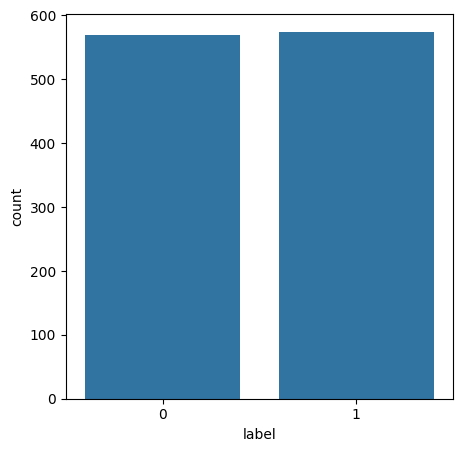

In [ ]:
# check count and unique and top values and their frequency
plt.figure(figsize=(5, 5))
sns.countplot(x=sms['label'])
plt.show()

In [ ]:
sms['label'].value_counts()

label
1    574
0    569
Name: count, dtype: int64

In [ ]:
sms.sample(10)

,Kategori,Teks,label
862,spam,Awal bulan saat nya anda eksis lebih lama! Int...,1
664,spam,PT. INDOFOOD tbk Menyampaikan bahwa anda terpi...,1
620,ham,"Iya teh, soalnya kenapa selasa, bapa hari rabu...",0
260,ham,"habis ini, pake groupwhere. biar ga berceceran...",0
1111,ham,Dr ciateul terus masa kekalapa lg (frown),0
884,ham,Ko gtu ya parah bgt masa jam kerja ngeroko. Bi...,0
627,ham,Ada internet min alamatnya dmn?,0
488,spam,Koinmu tinggal dikit untuk lanjutin gamesmu? B...,1
204,spam,PROMO LEBARAN.Paket Service Motor+Olie HANYA 3...,1
242,spam,SELAMAT: Anda T'rpilih L'ngsung M'ndptkan Hadi...,1


In [ ]:
sms['Teks']=sms['Teks'].str.lower()
sms

,Kategori,Teks,label
0,spam,plg yth: simcard anda mendptkan bonus poin plu...,1
1,ham,iya ih ko sedih sih gtau kapan lg ke bandung :(,0
2,ham,kalau mau bikin model/controller mending per a...,0
3,ham,selamat nama1. semoga selalu menempuh hidup ya...,0
4,spam,tingkatkan nilai isi ulang anda selanjutnya mi...,1
...,...,...,...
1138,ham,yg ragu sm bulet/datar atau yg pgn ikutan deba...,0
1139,ham,"semangat yang ibu gita, ibu putri dan bapak ad...",0
1140,ham,"nama1, minta database kamu sama view dan contr...",0
1141,spam,dapatkan gratis 1 cappuccino (hot/ice) & freza...,1


In [ ]:
import re

def clean_text(words):
    """The function to clean text"""
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()
    return " ".join(text)

In [ ]:
sms['Teks']=sms['Teks'].apply(clean_text)
sms

,Kategori,Teks,label
0,spam,plg yth simcard anda mendptkan bonus poin plus...,1
1,ham,iya ih ko sedih sih gtau kapan lg ke bandung,0
2,ham,kalau mau bikin model controller mending per a...,0
3,ham,selamat nama semoga selalu menempuh hidup yang...,0
4,spam,tingkatkan nilai isi ulang anda selanjutnya mi...,1
...,...,...,...
1138,ham,yg ragu sm bulet datar atau yg pgn ikutan deba...,0
1139,ham,semangat yang ibu gita ibu putri dan bapak adi...,0
1140,ham,nama minta database kamu sama view dan control...,0
1141,spam,dapatkan gratis cappuccino hot ice freza setia...,1


In [ ]:
def cleaning_text(text):
  return text.translate(str.maketrans("","",string.punctuation))
  return text.strip()
  return re.sub('\s+',' ',text)
  return re.sub(r"\b[a-zA-Z]\b", "", text)

In [ ]:
sms['Teks']=sms['Teks'].apply(clean_text)
sms

,Kategori,Teks,label
0,spam,plg yth simcard anda mendptkan bonus poin plus...,1
1,ham,iya ih ko sedih sih gtau kapan lg ke bandung,0
2,ham,kalau mau bikin model controller mending per a...,0
3,ham,selamat nama semoga selalu menempuh hidup yang...,0
4,spam,tingkatkan nilai isi ulang anda selanjutnya mi...,1
...,...,...,...
1138,ham,yg ragu sm bulet datar atau yg pgn ikutan deba...,0
1139,ham,semangat yang ibu gita ibu putri dan bapak adi...,0
1140,ham,nama minta database kamu sama view dan control...,0
1141,spam,dapatkan gratis cappuccino hot ice freza setia...,1


In [ ]:
def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

In [ ]:
sms['Teks']=sms['Teks'].apply(remove_tweet_special)
sms

,Kategori,Teks,label
0,spam,plg yth simcard anda mendptkan bonus poin plus...,1
1,ham,iya ih ko sedih sih gtau kapan lg ke bandung,0
2,ham,kalau mau bikin model controller mending per a...,0
3,ham,selamat nama semoga selalu menempuh hidup yang...,0
4,spam,tingkatkan nilai isi ulang anda selanjutnya mi...,1
...,...,...,...
1138,ham,yg ragu sm bulet datar atau yg pgn ikutan deba...,0
1139,ham,semangat yang ibu gita ibu putri dan bapak adi...,0
1140,ham,nama minta database kamu sama view dan control...,0
1141,spam,dapatkan gratis cappuccino hot ice freza setia...,1


## split data (dibagi jadi 3)

In [ ]:
RANDOM_SEED = 42

sms_train, sms_test = train_test_split(
    sms,
    test_size=0.2,
    random_state=RANDOM_SEED,
)

sms_val, sms_test = train_test_split(
    sms_test,
    test_size=0.4,
    random_state=RANDOM_SEED,
)

In [ ]:
print(f'Total Train: {len(sms_train)}')
print(f'Total Val  : {len(sms_val)}')
print(f'Total Test : {len(sms_test)}')

Total Train: 914
Total Val  : 137
Total Test : 92


In [ ]:
sms_train.to_csv("train.csv", index=False)
sms_val.to_csv("eval.csv", index=False)
sms_test.to_csv("test.csv", index=False)

In [ ]:
from datasets import load_dataset

files = {
    "train": "train.csv",
    "eval": "eval.csv",
    "test": "test.csv",
}

dataset = load_dataset('csv', data_files=files)

Generating train split: 0 examples [00:00, ? examples/s]

Generating eval split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

## melakukan tokenize

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
def tokenize_function(text):
    return tokenizer(text["Teks"], padding='max_length', max_length=256)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/914 [00:00<?, ? examples/s]

Map:   0%|          | 0/137 [00:00<?, ? examples/s]

Map:   0%|          | 0/92 [00:00<?, ? examples/s]

In [ ]:
train_dataset = tokenized_datasets["train"]
eval_dataset = tokenized_datasets["eval"]

In [ ]:
import torch
torch.cuda.empty_cache()

device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

## modeling

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("indobenchmark/indobert-base-p2", num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!pip install torch
!pip install accelerate
import torch
import accelerate

In [ ]:
from transformers import TrainingArguments
from torch import clamp

training_args = TrainingArguments(
    "test_trainer",
    per_device_train_batch_size=4,
)

In [ ]:
metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    return metric.compute(predictions=predictions, references=labels)

torch.cuda.empty_cache()

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

training_history = trainer.train()

<ipython-input-31-fd3739473b36>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


Step,Training Loss


Step,Training Loss
500,0.170500


In [ ]:
evaluation_history = trainer.evaluate()
evaluation_history

{'eval_loss': 0.035053595900535583,
 'eval_accuracy': 0.9854014598540146,
 'eval_runtime': 1.964,
 'eval_samples_per_second': 69.756,
 'eval_steps_per_second': 9.165,
 'epoch': 3.0}

In [ ]:
test_dataset = tokenized_datasets["test"]

prediction = trainer.predict(test_dataset)
prediction = prediction.predictions.argmax(1)

In [ ]:
actual_label = sms_test['label']

In [ ]:
print(classification_report(prediction, actual_label, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        44
           1       0.98      0.98      0.98        48

    accuracy                           0.98        92
   macro avg       0.98      0.98      0.98        92
weighted avg       0.98      0.98      0.98        92



## consufusion matriks

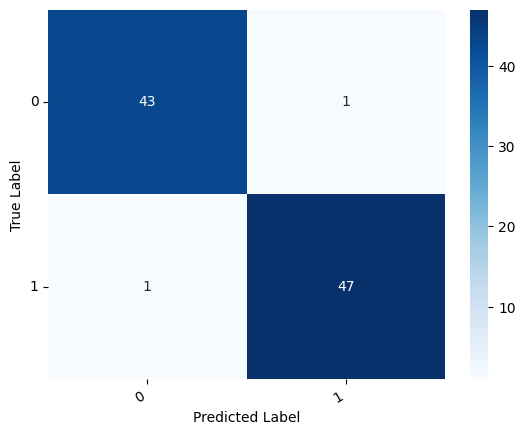

In [ ]:
def show_confusion_matrix(confusion_matrix):
        hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
        hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
        hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')

        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')

cm = confusion_matrix(prediction, actual_label)
show_confusion_matrix(cm)

Save Model

In [ ]:
model.save_pretrained("model")

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("model")

In [ ]:
trainer = Trainer(model=model)

## prediksi model



In [ ]:
def predict(text):
    tokenized = tokenizer(text, padding='max_length', max_length=256)
    label = trainer.predict([tokenized]).predictions.argmax(1)[0]
    if label == 0:
        print(f'Predicted: Ham [{label}]')
    else:
        print(f'Predicted: Spam [{label}]')

In [ ]:
predict("""
    Selamat!! anda Mendpt hadiah Rp. 75 juta. Dari TELKOMSEL point "Edisi september" Hub kntr pusat
""")

Predicted: Spam [1]


In [ ]:
predict("""
    Assalamualaikum Pak. Ini dg nama1 ilkom 2012. Maaf Pak td saya ninggalin proposal di meja Bapak di atas printer. Terima kasih Pak.
""")

Predicted: Ham [0]


In [ ]:
predict("""
    selamat siang pak, apakah ini dengan pak rendra?
""")

Predicted: Ham [0]


In [ ]:
predict("""
    Gratis masuk di 2 a wkly comp untuk memenangkan final Piala FA tkts 21 Mei 2005. SMS FA ke 87121 untuk menerima pertanyaan entri (std txt rate) T & C berlaku 08452810075over18
""")

Predicted: Spam [1]


In [ ]:
predict("""
    Sex up ponsel Anda dengan pic seksi GRATIS Yordania! Cukup SMS BABE ke 88600. Kemudian setiap wk mendapatkan selebriti seksi! PocketBabe.co.uk 4 foto lagi. 16 å£3/wk 087016248
""")

Predicted: Spam [1]


In [ ]:
predict("""
    Selamat anda mendapatkan hadiah sebesar 100 rupiah?
""")

Predicted: Spam [1]


In [ ]:
torch.save(model, 'my_bert_model.pth')

model = torch.load('my_bert_model.pth')